In [67]:
import csv
from rosbags.rosbag2 import Reader
from rosbags.serde import deserialize_cdr
#Import the message type you wanted 
from rclpy.serialization import deserialize_message
from nav_msgs.msg import Odometry
from quadrotor_msgs.msg import PositionCommand
import numpy as np
import matplotlib.pyplot as plt


In [12]:
#Declare the 2 topics you want to read by ID
#This can be done by topics.csv
odom_id_ = 3
odom_cmd_topic_type = Odometry

position_cmd_id_ = 4
position_cmd_topic_type = PositionCommand
#Change this to file path to the message.csv
csv_file_name = './csv/messages.csv'

In [99]:
#Converts a string of characters (0-255) to a stream of bytes
def str_to_byteList(in_str):
    count = 0
    for item in in_str.split(','):
        byte_value = int(item)
        if byte_value < 256:
            #If the first one set it to this
            if count== 0:
                bytes_list = bytes([byte_value])
                count+=1
            #Otherwise append bytes
            else:
                bytes_list  = bytes_list + bytes([byte_value])
        else:
            print(f"Warning: {byte_value} is greater than 255 and cannot be interpreted as an 8-bit object.")
    return bytes_list

# Open the CSV file
odom_count = 0
position_count = 0
with open(csv_file_name, mode='r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    #rows = list(csv_reader)
    max_num_msgs = 1000000
    # Read and print each row
    position_cmd_list = np.zeros((max_num_msgs,4))
    odom_list = np.zeros((max_num_msgs,4))
    velocity_cmd_list = np.zeros((max_num_msgs,4))
    odom_twist_list = np.zeros((max_num_msgs,4))

    for row in csv_reader:
        #Rows are Strings in each filed
        if row[1] == str(odom_id_):
            #Convert to Byte Stream
            raw_data = str_to_byteList(row[3])
            #Deseralzize bytes
            msg = deserialize_message(raw_data, Odometry)
            #print(msg.header.stamp.sec + msg.header.stamp.nanosec*1e-9)
            #Input Data
            odom_list[odom_count,0] = msg.header.stamp.sec + msg.header.stamp.nanosec*1e-9
            odom_list[odom_count,1] = msg.pose.pose.position.x
            odom_list[odom_count,2] = msg.pose.pose.position.y
            odom_list[odom_count,3] = msg.pose.pose.position.z
            #Odometry count
            odom_count+=1
        if row[1] == str(position_cmd_id_):
            raw_data = str_to_byteList(row[3])
            msg = deserialize_message(raw_data, PositionCommand)
            position_cmd_list[position_count,0] = msg.header.stamp.sec + msg.header.stamp.nanosec*1e-9
            position_cmd_list[position_count,1] = msg.position.x
            position_cmd_list[position_count,2] = msg.position.y
            position_cmd_list[position_count,3] = msg.position.z
            #Position count
            position_count+=1
#print(position_count)
position_cmd_list = position_cmd_list[:position_count, :]
odom_list = odom_list[:odom_count, :]

In [101]:
print(odom_list.shape)
print(position_cmd_list.shape)

(41090, 4)
(9442, 4)


(0.0, 100.0)

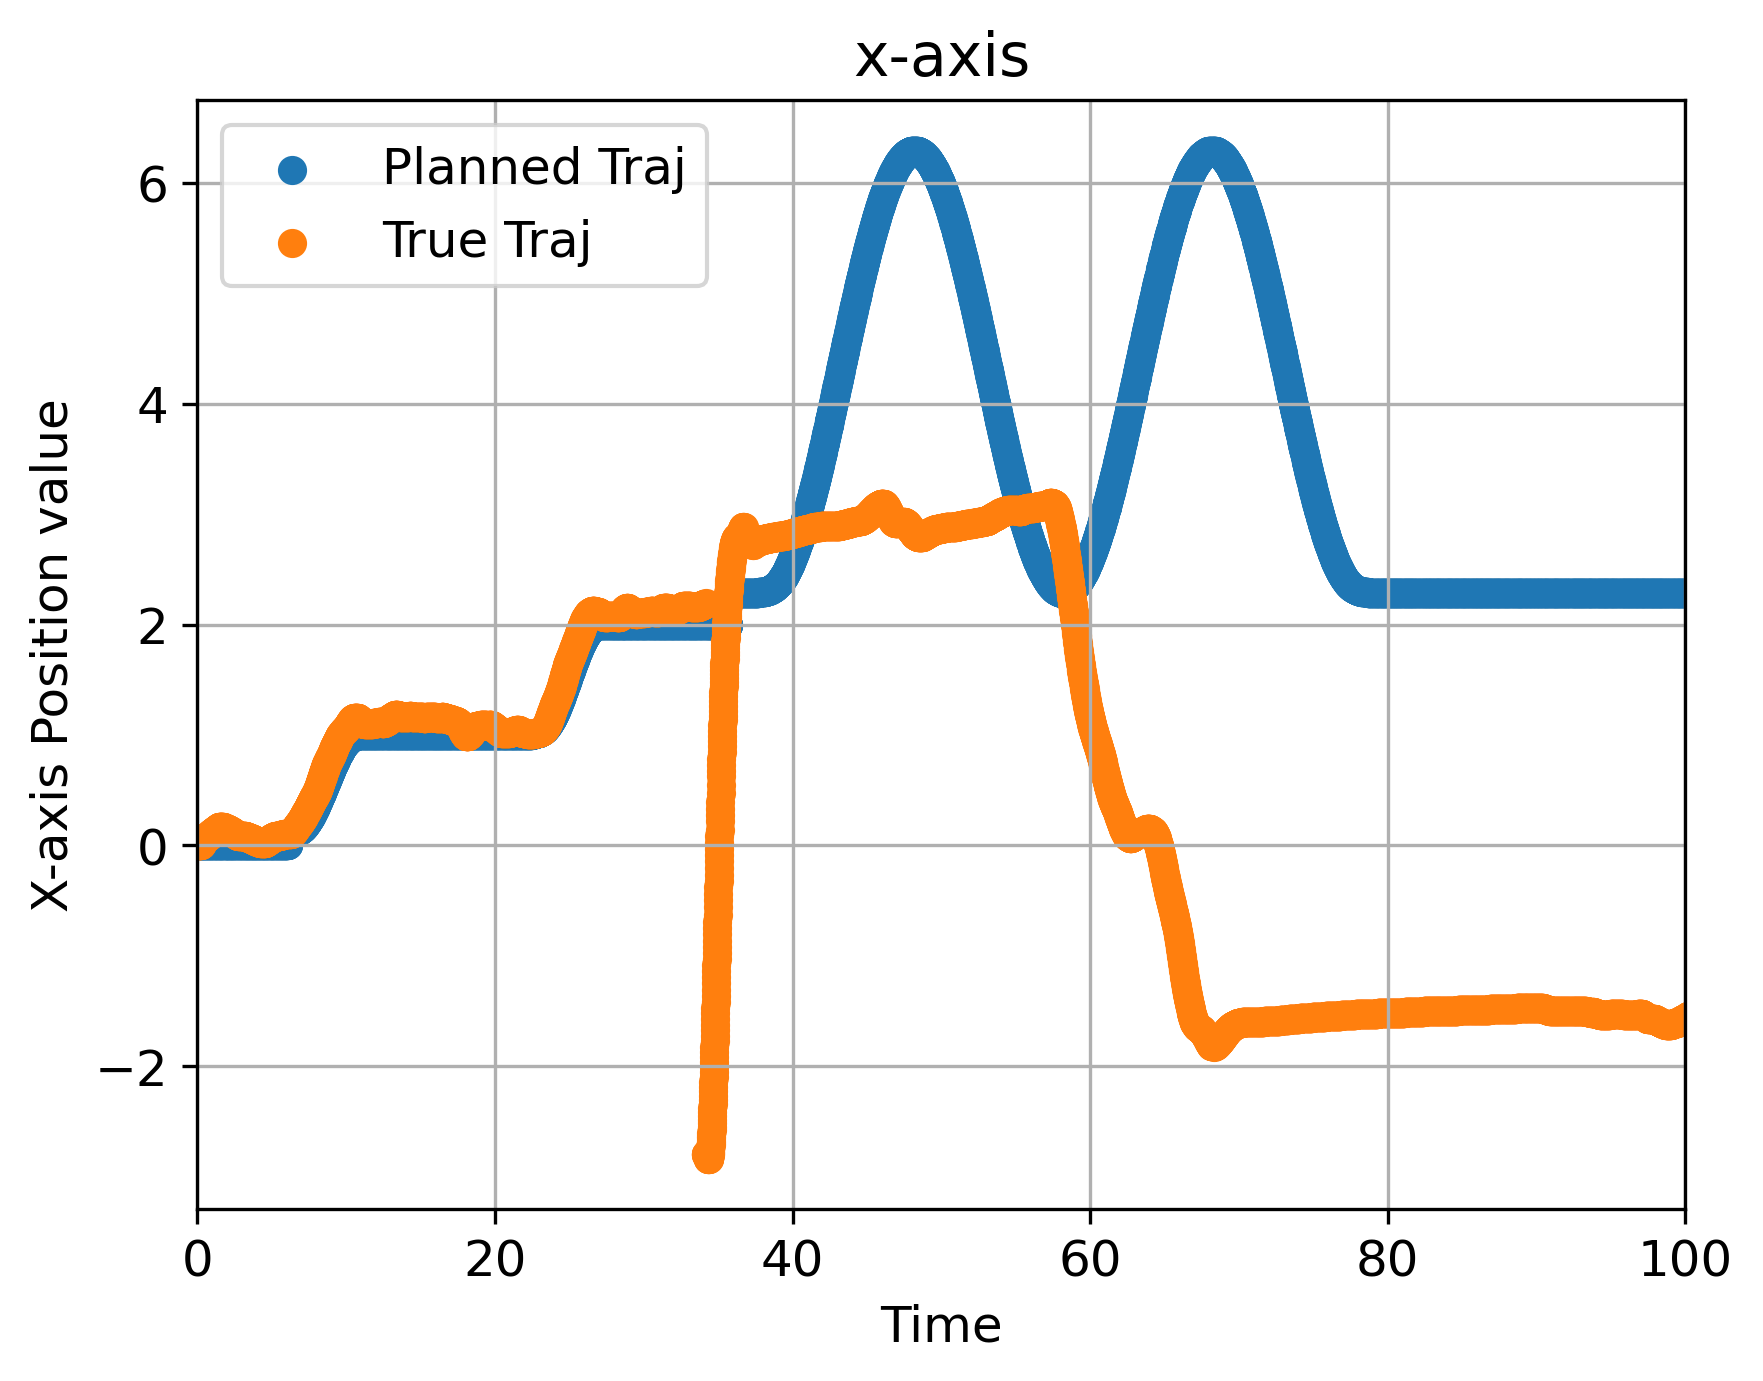

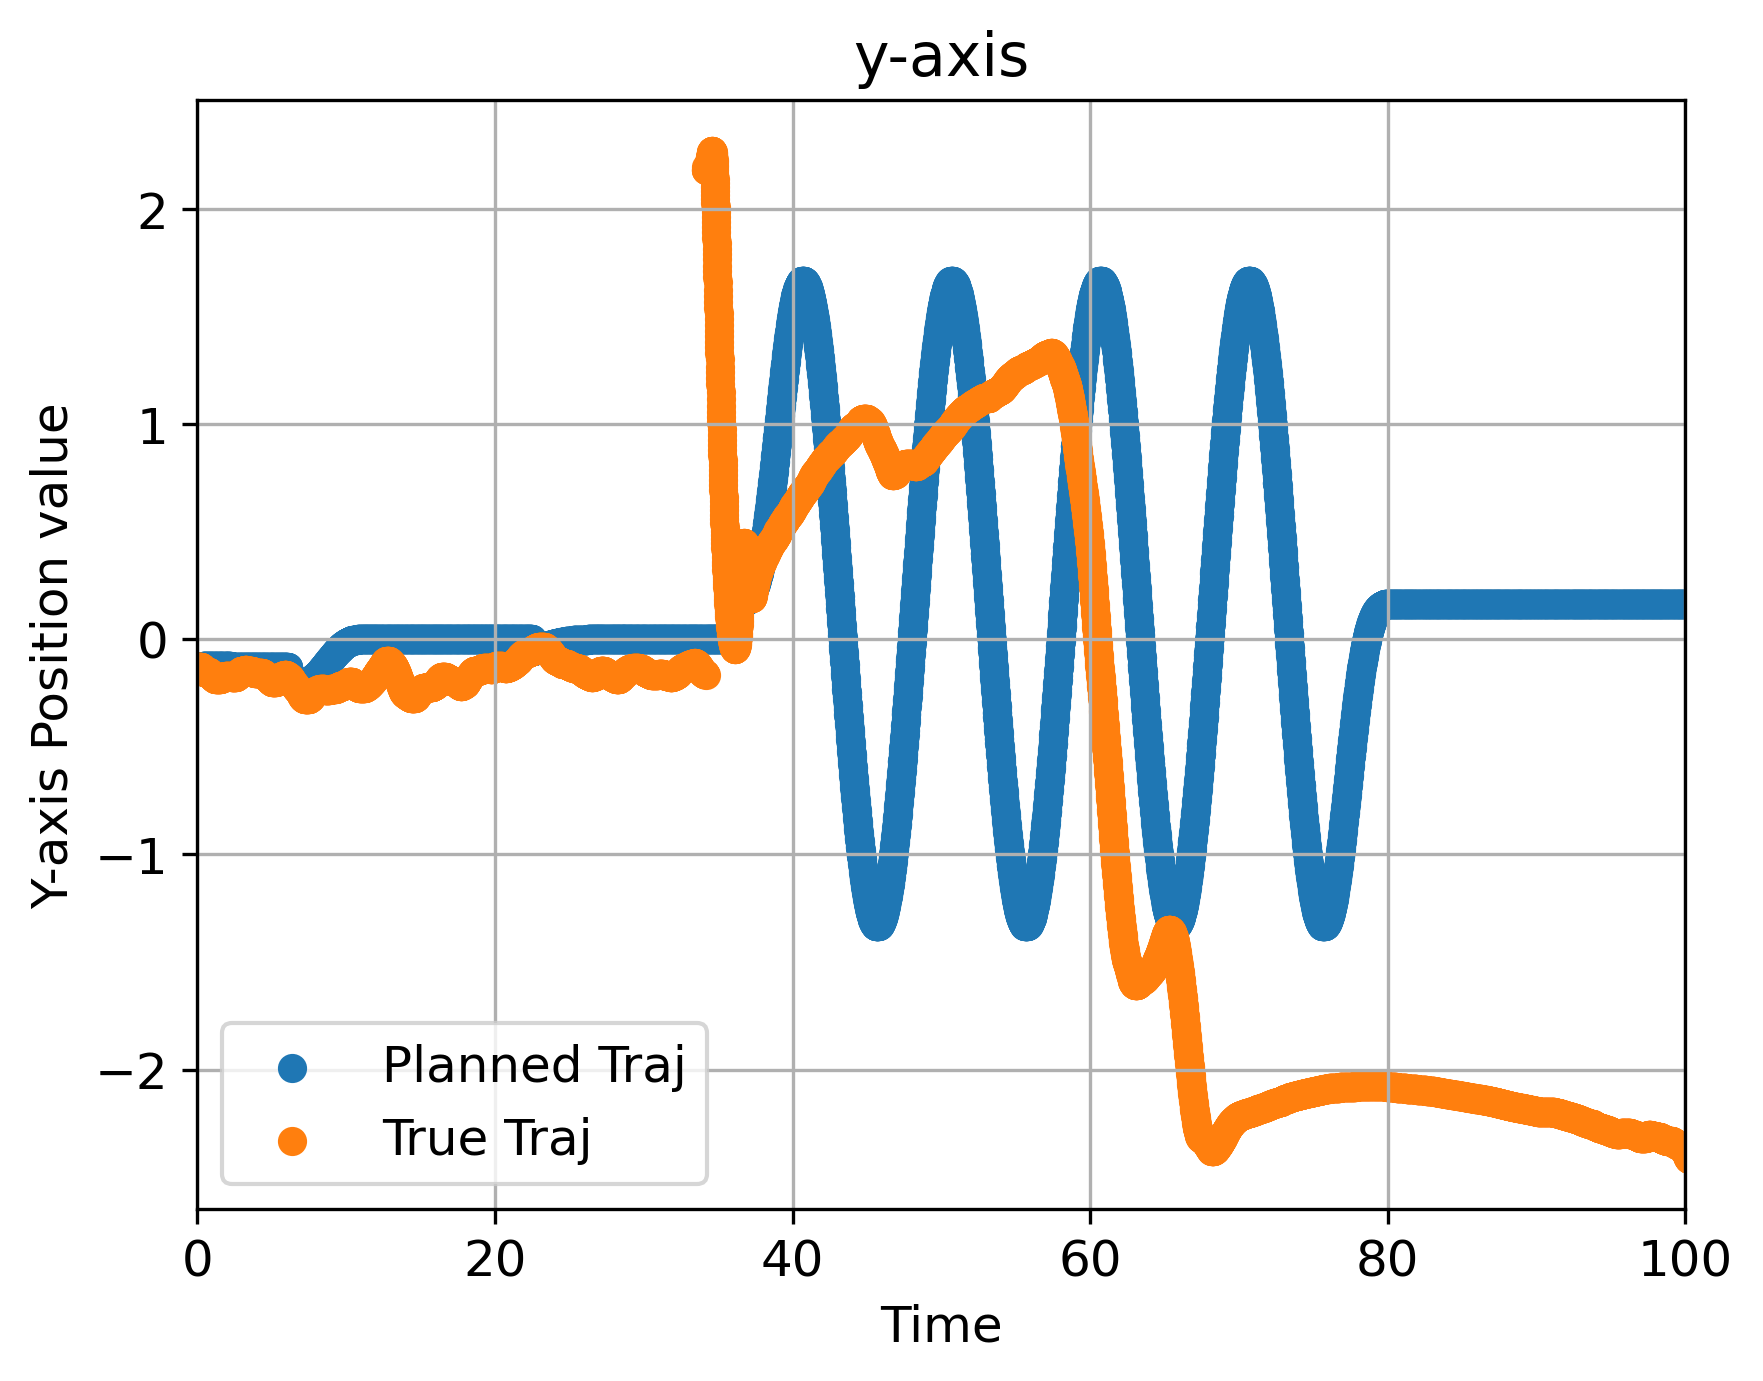

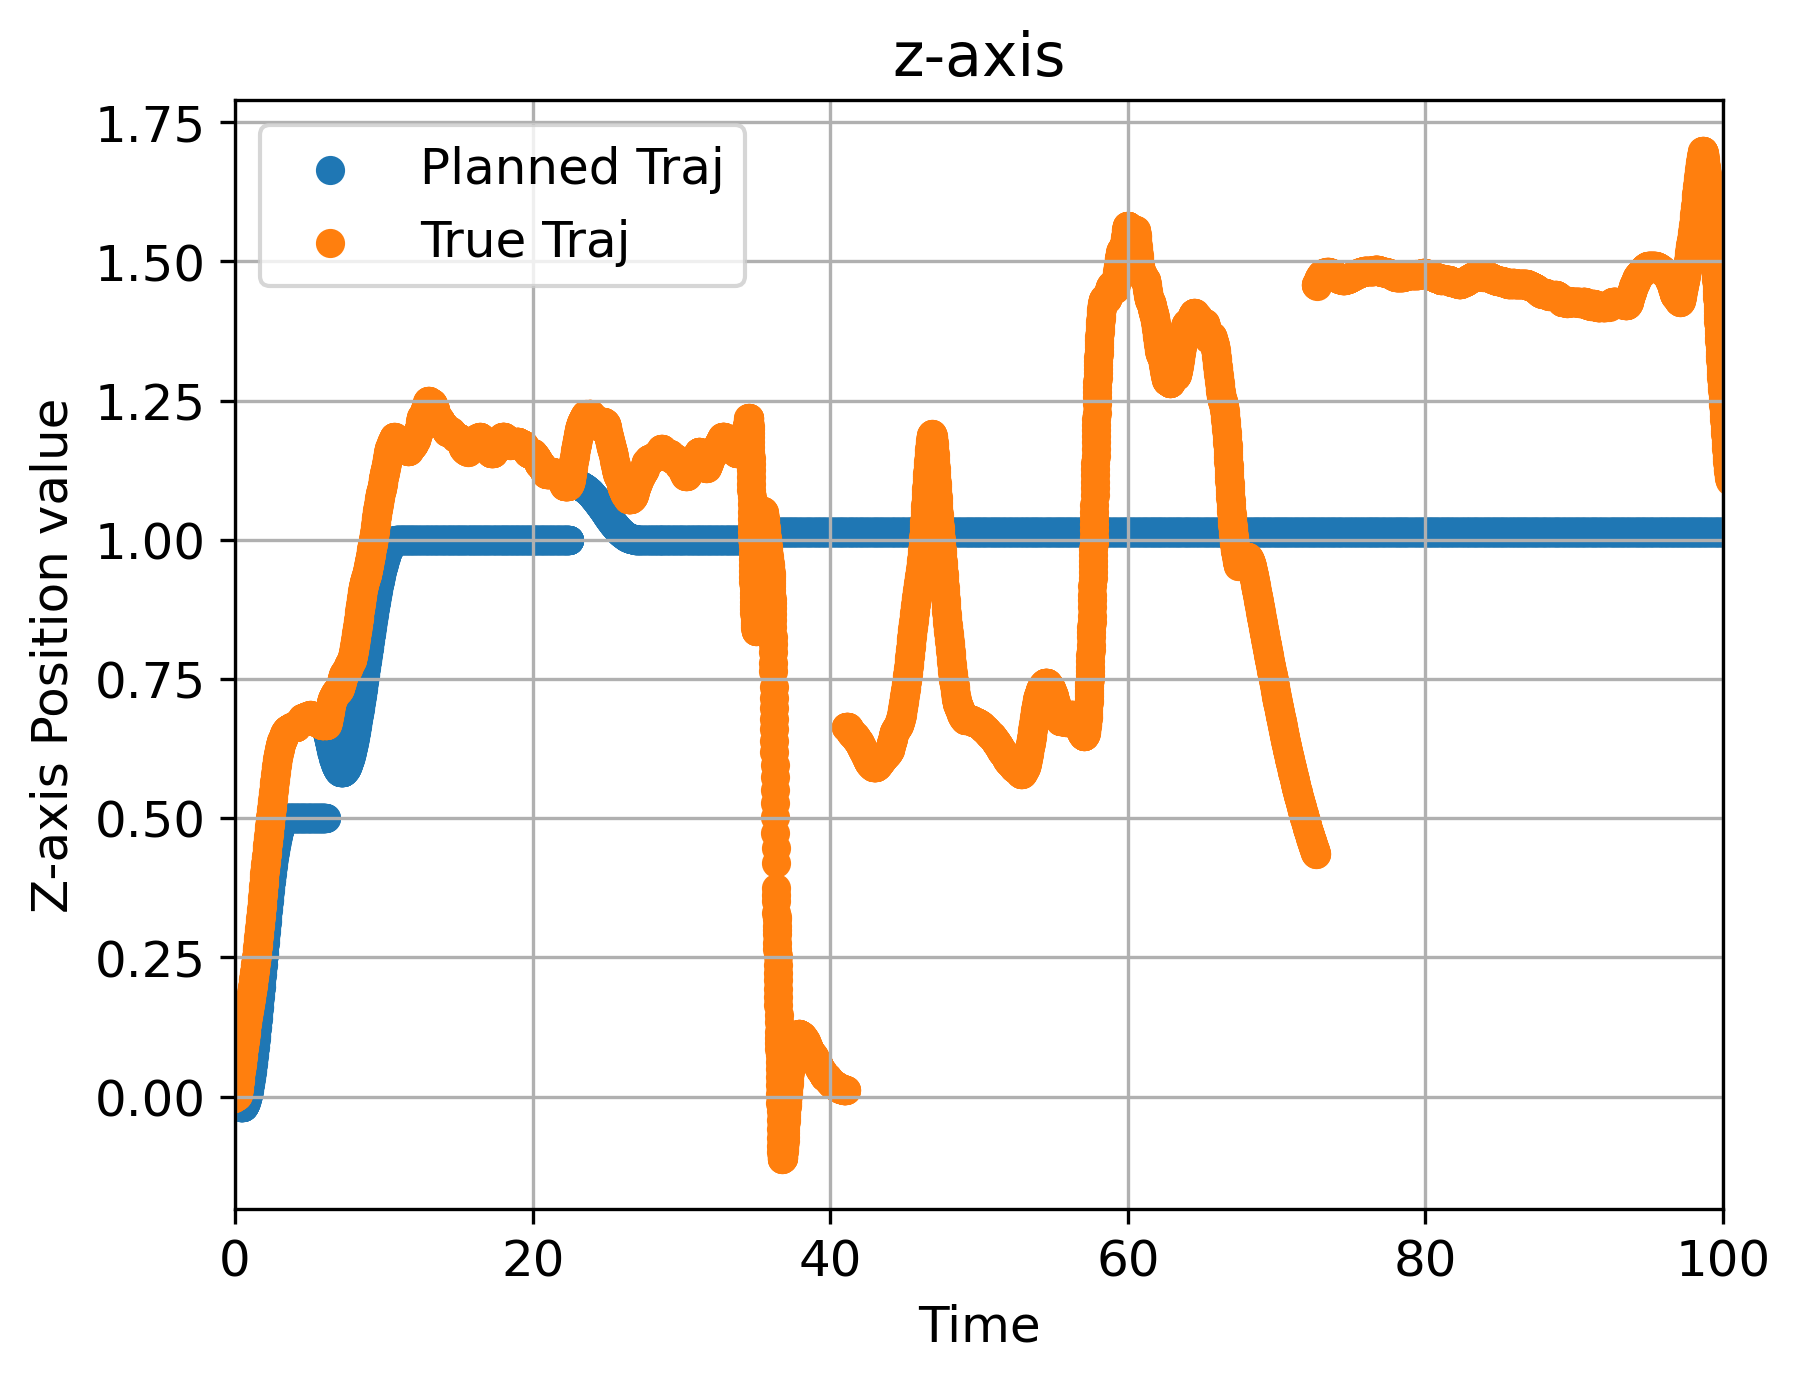

In [104]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300

start_time = 0.0
end_time = 100.0
# Replanning begin 10925 end 11410
#3M 2.2 time
plt.figure()
axis = 1
plt.scatter(position_cmd_list[:,0]-position_cmd_list[0,0],position_cmd_list[:,axis])
plt.scatter(odom_list[:,0]-position_cmd_list[0,0],odom_list[:,axis])
plt.title("x-axis Position")
plt.legend(['Planned Traj', 'True Traj'])
plt.xlabel("Time")
plt.ylabel("X-axis Position value")
plt.grid()
plt.xlim(start_time,end_time)

plt.figure()
axis = 2
plt.scatter(position_cmd_list[:,0]-position_cmd_list[0,0],position_cmd_list[:,axis])
plt.scatter(odom_list[:,0]-position_cmd_list[0,0],odom_list[:,axis])
plt.title("y-axis Position")
plt.legend(['Planned Traj', 'True Traj'])
plt.xlabel("Time")
plt.ylabel("Y-axis Position value")
plt.grid()
plt.xlim(start_time,end_time)
#plt.ylim(-1,1)

plt.figure()
axis = 3
plt.scatter(position_cmd_list[:,0]-position_cmd_list[0,0],position_cmd_list[:,axis])
plt.scatter(odom_list[:,0]-position_cmd_list[0,0],odom_list[:,axis])
plt.title("z-axis Position")
plt.legend(['Planned Traj', 'True Traj'])
plt.xlabel("Time")
plt.ylabel("Z-axis Position value")
plt.grid()
plt.xlim(start_time,end_time)
#plt.ylim(9.5,10.5)
